# Compare Audios


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.gridspec import GridSpec

In [2]:
audio_filename1 = "/workspaces/voice-analysis/data/02_processed/3fa78e75edbf4bd685c6596470cab0c7__mario-perspicacia.wav/3fa78e75edbf4bd685c6596470cab0c7__mario-perspicacia.wav_pitch.csv"
audio_filename2 = "/workspaces/voice-analysis/data/02_processed/b9f03fc880a047359b1cf38596efd2f5__joseph-perspicacia.wav/b9f03fc880a047359b1cf38596efd2f5__joseph-perspicacia.wav_pitch.csv"
dfAudio1 = pd.read_csv(audio_filename1)
dfAudio2 = pd.read_csv(audio_filename2)

audio_caption_1 = os.path.splitext(os.path.basename(audio_filename1))[0][34:]
audio_caption_2 = os.path.splitext(os.path.basename(audio_filename2))[0][34:]

marker_size = 1


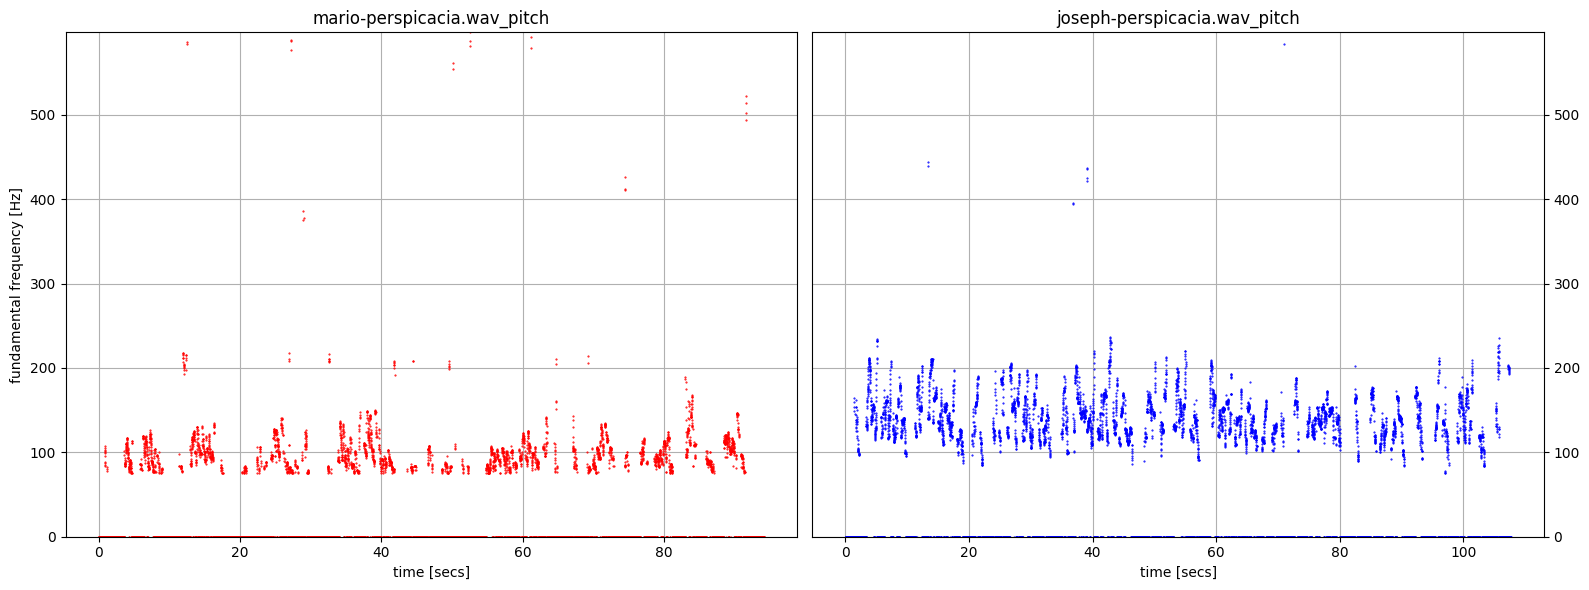

In [3]:

pitch_values1 = dfAudio1['frequency']
#pitch_values1[pitch_values1 == 0] = np.nan    

pitch_values2 = dfAudio2['frequency']
#pitch_values2[pitch_values2 == 0] = np.nan    
# First diagram: plot them side by side in different charts without horizontal shadow of voice categories reference nor legend
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)

plt.plot(dfAudio1['time'], pitch_values1, '.', markersize=marker_size, color="red")            
plt.ylim(0, max(np.nanmax(pitch_values1), np.nanmax(pitch_values2)))  
plt.ylabel("fundamental frequency [Hz]")
plt.xlabel("time [secs]")
plt.grid(True, axis='both')
plt.title(audio_caption_1)

plt.subplot(1, 2, 2)

plt.plot(dfAudio2['time'], pitch_values2, '.', markersize=marker_size, color="blue")            
plt.ylim(0, max(np.nanmax(pitch_values1), np.nanmax(pitch_values2)))  
plt.xlabel("time [secs]")
plt.title(audio_caption_2)
plt.gca().yaxis.set_label_position("right")
plt.gca().yaxis.tick_right()

plt.grid(True, axis='both')
plt.subplots_adjust(wspace=0)  # Minimize the horizontal space between the plots
plt.tight_layout()
plt.show()

__init__


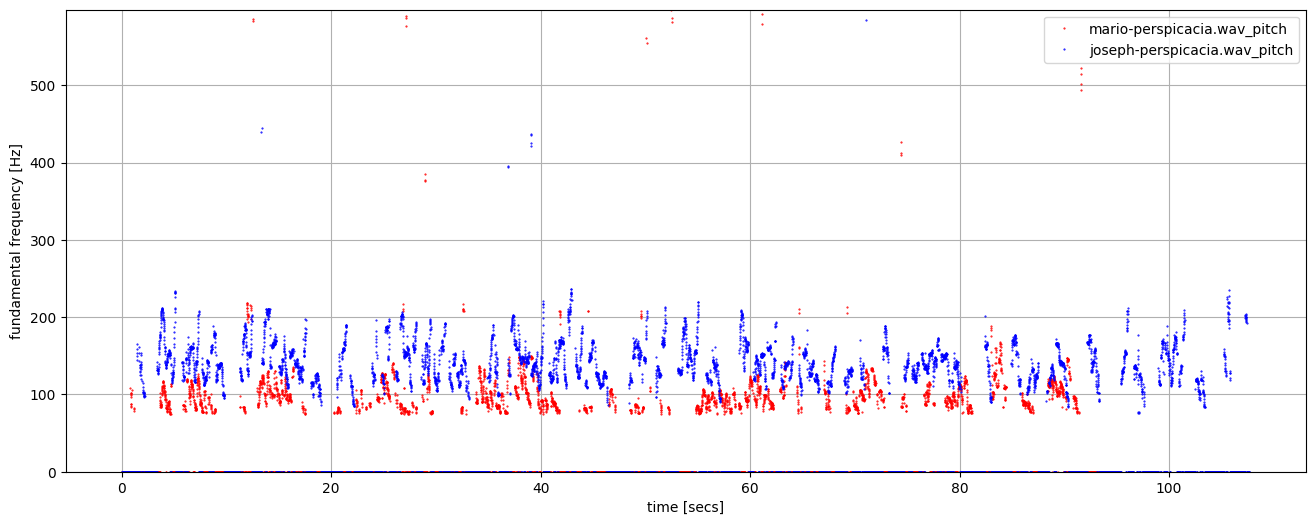

In [4]:
from notebooks.audio_utils import draw_horizontal_shadows, draw_legend, categories

# Second diagram: plot them in the same chart with horizontal shadow of voice categories reference and legend
plt.figure(figsize=(16, 6))
plt.plot(dfAudio1['time'], pitch_values1, '.', markersize=marker_size, color="red", label=audio_caption_1)            
plt.plot(dfAudio2['time'], pitch_values2, '.', markersize=marker_size, color="blue", label=audio_caption_2)            
plt.ylim(0, max(np.nanmax(pitch_values1), np.nanmax(pitch_values2)))  
plt.ylabel("fundamental frequency [Hz]")
plt.xlabel("time [secs]")
plt.grid(True, axis='both')

#draw_horizontal_shadows(plt, 0.2)
#draw_legend(plt, 0.4)

plt.legend()
plt.show()

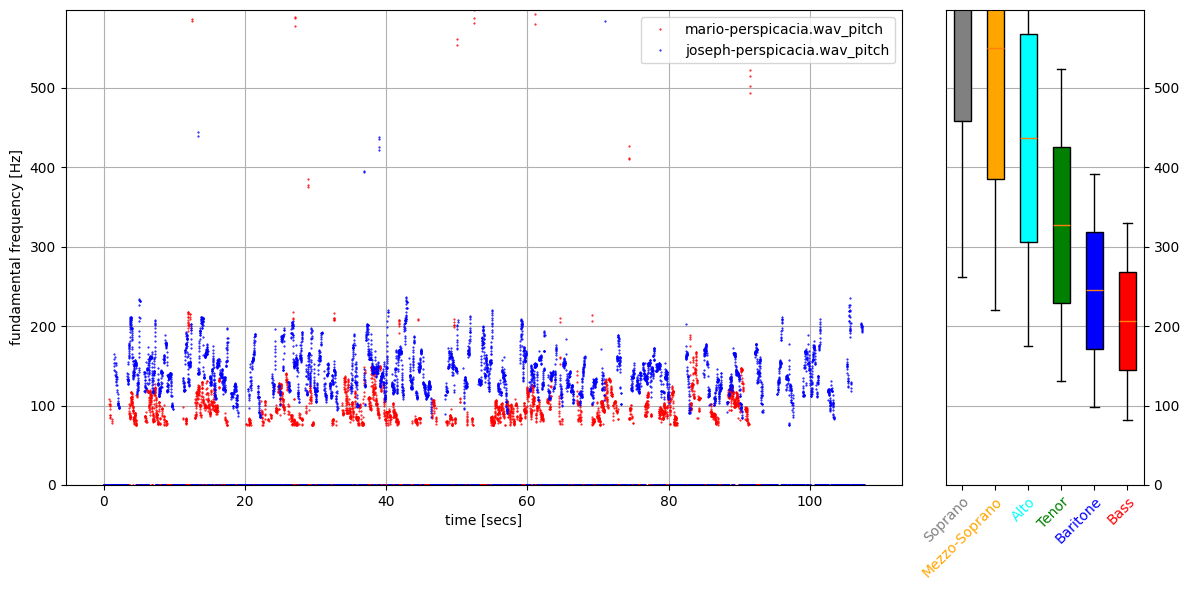

In [5]:

# Create a figure with GridSpec
fig = plt.figure(figsize=(12, 6))
gs = GridSpec(1, 3, width_ratios=[2, 2, 1])  # Adjust width_ratios to make the right plot smaller

# First subplot: Audio pitch measures
ax1 = fig.add_subplot(gs[0, 0:2])  # Span the first two columns
ax1.plot(dfAudio1['time'], pitch_values1, '.', markersize=marker_size, color="red", label=audio_caption_1)            
ax1.plot(dfAudio2['time'], pitch_values2, '.', markersize=marker_size, color="blue", label=audio_caption_2)            
ax1.set_ylim(0, max(np.nanmax(pitch_values1), np.nanmax(pitch_values2)))  
ax1.set_ylabel("fundamental frequency [Hz]")
ax1.set_xlabel("time [secs]")
ax1.grid(True, axis='both')
ax1.legend()

# Second subplot: Box plot of vocal categories
ax2 = fig.add_subplot(gs[0, 2])  # Use the third column
box = ax2.boxplot([v["range"] for v in categories.values()], patch_artist=True, tick_labels=categories.keys())
# Set the colors for each box
for patch, color in zip(box['boxes'], [v["color"] for v in categories.values()]):
    patch.set_facecolor(color)
    patch.set_alpha(1)
ax2.set_ylim(0, max(np.nanmax(pitch_values1), np.nanmax(pitch_values2)))  
ax2.grid(True, axis='y')
ax2.yaxis.set_label_position("right")
ax2.yaxis.tick_right()
# Adjust x-axis labels to make them readable and not overlap with each other and set their color to match v["color"]
labels = ax2.get_xticklabels()
for label, color in zip(labels, [v["color"] for v in categories.values()]):
    label.set_color(color)    
plt.setp(labels, rotation=45, ha="right", rotation_mode="anchor")
plt.subplots_adjust(wspace=0)  # Minimize the horizontal space between the plots
plt.tight_layout()
plt.show()